In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import pickle
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [3]:
with np.load('mnist.npz') as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

In [4]:

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


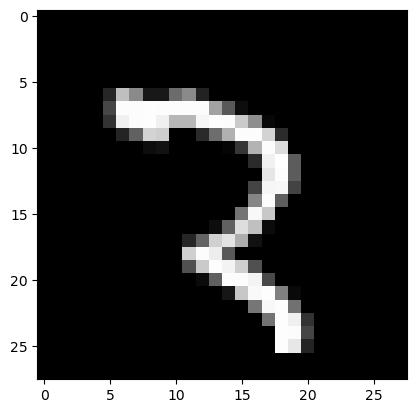

In [5]:
plt.imshow(x_train[500],'gray')

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
y_train_oh=to_categorical(y_train)
y_test_oh=to_categorical(y_test)
x_train_vec=x_train.reshape(60000,-1)/255.0
x_test_vec=x_test.reshape(10000,-1)/255.0


In [8]:
print(x_train_vec.max())
print(x_train_vec.min())

1.0
0.0


In [9]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
model=Sequential()
model.add(Input(shape=(x_train_vec.shape[1],)))
model.add(Dense(x_train_vec.shape[1],activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 256)               200960    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 818,970
Trainable params: 818,970
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
res=model.fit(x_train_vec,y_train_oh,epochs=3,validation_data=(x_test_vec,y_test_oh))

Epoch 1/3
1875/1875 [==============================] - 184s 84ms/step - loss: 0.1794 - accuracy: 0.9453 - val_loss: 0.0848 - val_accuracy: 0.9729
Epoch 2/3
1875/1875 [==============================] - 145s 78ms/step - loss: 0.0780 - accuracy: 0.9752 - val_loss: 0.0774 - val_accuracy: 0.9761
Epoch 3/3
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0518 - accuracy: 0.9835 - val_loss: 0.0845 - val_accuracy: 0.9754


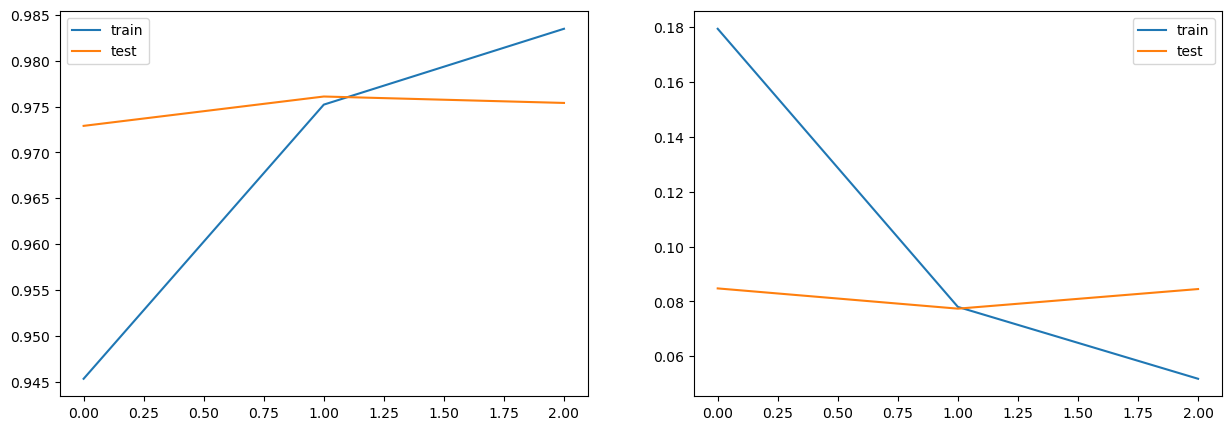

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])
plt.legend(['train','test'])


plt.subplot(1,2,2)
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.legend(['train','test'])

In [14]:
model.save('mnist_model.h5')